<a href="https://colab.research.google.com/github/Sucipta17/UAS/blob/main/UAS_Sucipta_25_21_1613.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Segmentasi Pelanggan E-Commerce Menggunakan Metode K-Means Clustering**


NAMA  : Sucipta Aditri Laksana


NIM   : 25.21.1613

Link Dataset : https://archive.ics.uci.edu/dataset/352/online+retail

**1. IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**2. LOAD DATASET (PUBLIC DATASET)**

In [ ]:
data = pd.read_excel("Online Retail.xlsx")

print("Jumlah data awal:", data.shape)
print(data.head())

Jumlah data awal: (541909, 8)
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


**3. DATA PREPROCESSING**

In [ ]:
# Hapus data yang memiliki nilai kosong
data = data.dropna()

# Hapus transaksi pembatalan (Quantity negatif)
data = data[data["Quantity"] > 0]

# Konversi InvoiceDate ke datetime
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

# Buat fitur TotalPrice
data["TotalPrice"] = data["Quantity"] * data["UnitPrice"]

print("Jumlah data setelah preprocessing:", data.shape)

Jumlah data setelah preprocessing: (397924, 9)


**4. FEATURE ENGINEERING (RFM)**

In [ ]:
# Tanggal referensi (tanggal transaksi terakhir)
reference_date = data["InvoiceDate"].max()

rfm = data.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (reference_date - x.max()).days,  # Recency
    "InvoiceNo": "count",                                      # Frequency
    "TotalPrice": "sum"                                        # Monetary
})

rfm.columns = ["Recency", "Frequency", "Monetary"]

print("\nData RFM:")
print(rfm.head())


Data RFM:
            Recency  Frequency  Monetary
CustomerID                              
12346.0         325          1  77183.60
12347.0           1        182   4310.00
12348.0          74         31   1797.24
12349.0          18         73   1757.55
12350.0         309         17    334.40


**5. FEATURE SCALING**

In [ ]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)


**6. MENENTUKAN JUMLAH CLUSTER (ELBOW METHOD)**

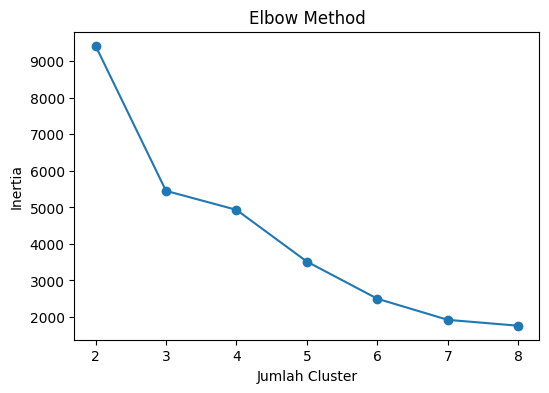

In [ ]:
inertia = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2, 9), inertia, marker="o")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

**7. MODELING (K-MEANS CLUSTERING)**

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)

**8. EVALUATION**

In [ ]:
silhouette = silhouette_score(rfm_scaled, rfm["Cluster"])
print("Silhouette Score:", silhouette)

Silhouette Score: 0.3582820982995069


**9. VISUALISASI HASIL CLUSTER**

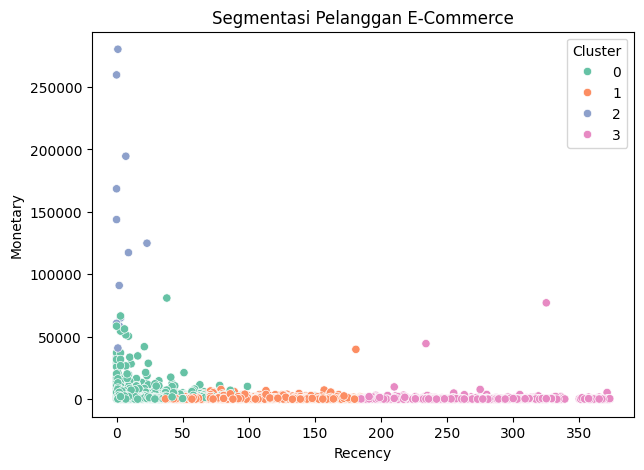

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="Recency",
    y="Monetary",
    hue="Cluster",
    data=rfm,
    palette="Set2"
)
plt.title("Segmentasi Pelanggan E-Commerce")
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.show()